# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Pre-processing

## Import Dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/BJIT Materials/Dataset/Merged Mental Health Status Survey (20 Datasets Combined) - Form responses 1.csv")

## Preview of Dataset

In [ ]:
df.head()

,What is your age?,What is your gender?,How many hours of sleep do you typically get per night?,How would you rate your stress level?,How often do you exercise?,How frequently do you engage in social interactions?
0,23,Female,6.0,6.0,3.0,4.0
1,23,Male,7.0,7.0,1.0,3.0
2,20,Female,6.0,1.0,0.0,4.0
3,20,Male,3.0,7.0,3.0,4.0
4,23,Female,6.0,8.0,0.0,3.0


In [ ]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1053 entries, 0 to 1052
Data columns (total 6 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   What is your age?                                        1053 non-null   int64  
 1   What is your gender?                                     1052 non-null   object 
 2   How many hours of sleep do you typically get per night?  1049 non-null   float64
 3   How would you rate your stress level?                    1045 non-null   float64
 4   How often do you exercise?                               1048 non-null   float64
 5   How frequently do you engage in social interactions?     1045 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 49.5+ KB
None


In [ ]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       What is your age?  \
count        1053.000000   
mean           27.862298   
std             7.826969   
min            18.000000   
25%            24.000000   
50%            25.000000   
75%            28.000000   
max            70.000000   

       How many hours of sleep do you typically get per night?  \
count                                        1049.000000         
mean                                            6.511725         
std                                             1.287701         
min                                             2.000000         
25%                                             6.000000         
50%                                             6.000000         
75%                                             7.000000         
max                                            10.000000         

       How would you rate your stress level?  How often do you exercise?  \
count                            1045.000000           

In [ ]:
print(df.isnull().sum())

# Display the processed DataFrame
df.head()

What is your age?                                          0
What is your gender?                                       1
How many hours of sleep do you typically get per night?    4
How would you rate your stress level?                      8
How often do you exercise?                                 5
How frequently do you engage in social interactions?       8
dtype: int64


,What is your age?,What is your gender?,How many hours of sleep do you typically get per night?,How would you rate your stress level?,How often do you exercise?,How frequently do you engage in social interactions?
0,23,Female,6.0,6.0,3.0,4.0
1,23,Male,7.0,7.0,1.0,3.0
2,20,Female,6.0,1.0,0.0,4.0
3,20,Male,3.0,7.0,3.0,4.0
4,23,Female,6.0,8.0,0.0,3.0


## Fill null values with the mean for numerical columns

In [ ]:

for col in df.select_dtypes(include=np.number):
    df[col] = df[col].fillna(df[col].mean())

# Display the processed DataFrame
df.head()

,What is your age?,What is your gender?,How many hours of sleep do you typically get per night?,How would you rate your stress level?,How often do you exercise?,How frequently do you engage in social interactions?
0,23,Female,6.0,6.0,3.0,4.0
1,23,Male,7.0,7.0,1.0,3.0
2,20,Female,6.0,1.0,0.0,4.0
3,20,Male,3.0,7.0,3.0,4.0
4,23,Female,6.0,8.0,0.0,3.0


In [ ]:
print(df.isnull().sum())

What is your age?                                          0
What is your gender?                                       1
How many hours of sleep do you typically get per night?    0
How would you rate your stress level?                      0
How often do you exercise?                                 0
How frequently do you engage in social interactions?       0
dtype: int64


## Fill null values with mode for categoricoal values

In [ ]:
for col in df.select_dtypes(exclude=np.number):
    df[col] = df[col].fillna(df[col].mode())

print(df.isnull().sum())

What is your age?                                          0
What is your gender?                                       0
How many hours of sleep do you typically get per night?    0
How would you rate your stress level?                      0
How often do you exercise?                                 0
How frequently do you engage in social interactions?       0
dtype: int64


## Set Target Variable

In [ ]:


def mental_health_status(row):
    sleep = row['How many hours of sleep do you typically get per night?']
    exercise = row['How often do you exercise?']
    social = row['How frequently do you engage in social interactions?']

    if sleep >= 7 and exercise >= 1 and social >= 1:
        return 'Good'
    elif (sleep >= 5 and sleep < 7) and (exercise > 1 and exercise <= 3) and social >= 1:
        return 'Fair'
    else:
        return 'Poor'  # Handle cases that don't fit the criteria

df['Mental Health Status'] = df.apply(mental_health_status, axis=1)
df.head()

,What is your age?,What is your gender?,How many hours of sleep do you typically get per night?,How would you rate your stress level?,How often do you exercise?,How frequently do you engage in social interactions?,Mental Health Status
0,23,Female,6.0,6.0,3.0,4.0,Fair
1,23,Male,7.0,7.0,1.0,3.0,Good
2,20,Female,6.0,1.0,0.0,4.0,Poor
3,20,Male,3.0,7.0,3.0,4.0,Poor
4,23,Female,6.0,8.0,0.0,3.0,Poor


In [ ]:
df['Mental Health Status'].value_counts()

,count
Mental Health Status,
Poor,422
Good,326
Fair,304


In [ ]:

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Mental Health Status' column
df['Mental Health Status'] = label_encoder.fit_transform(df['Mental Health Status'])

# Display the encoded DataFrame
df.head()

,What is your age?,What is your gender?,How many hours of sleep do you typically get per night?,How would you rate your stress level?,How often do you exercise?,How frequently do you engage in social interactions?,Mental Health Status
0,23,Female,6.0,6.0,3.0,4.0,0
1,23,Male,7.0,7.0,1.0,3.0,1
2,20,Female,6.0,1.0,0.0,4.0,2
3,20,Male,3.0,7.0,3.0,4.0,2
4,23,Female,6.0,8.0,0.0,3.0,2


# ---------------- UNIVARIATE ANALYSIS ----------------

In [ ]:
df.columns

Index(['What is your age?', 'What is your gender?',
       'How many hours of sleep do you typically get per night?',
       'How would you rate your stress level?', 'How often do you exercise?',
       'How frequently do you engage in social interactions?',
       'Mental Health Status'],
      dtype='object')

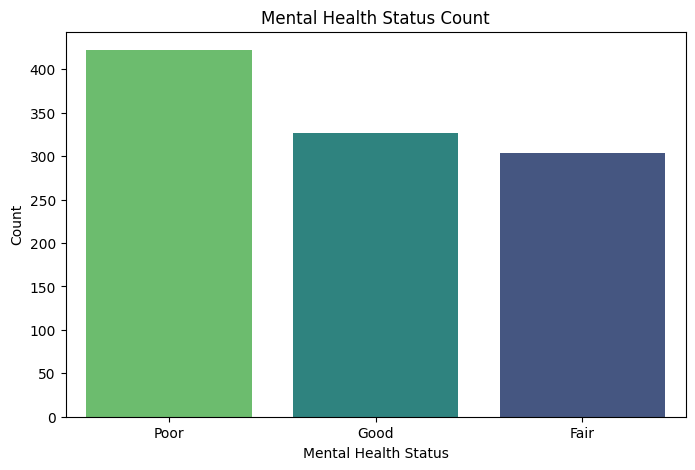

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Mental Health Status', data=df, palette='viridis', hue='Mental Health Status', order=df['Mental Health Status'].value_counts().index)
plt.title("Mental Health Status Count")
plt.xlabel("Mental Health Status")
plt.ylabel("Count")
plt.show()

## KDE Plot for Stress Level

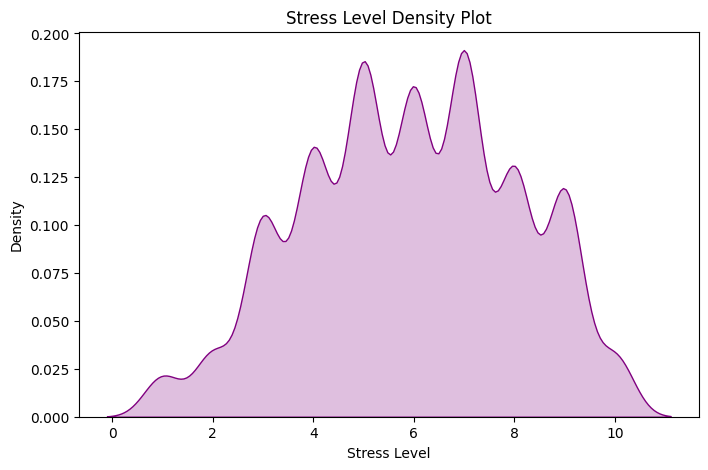

In [ ]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df['How would you rate your stress level?'], fill=True, color='purple', bw_adjust=0.7)
plt.title("Stress Level Density Plot")
plt.xlabel("Stress Level")
plt.show()

## Pie Chart for Gender Distribution

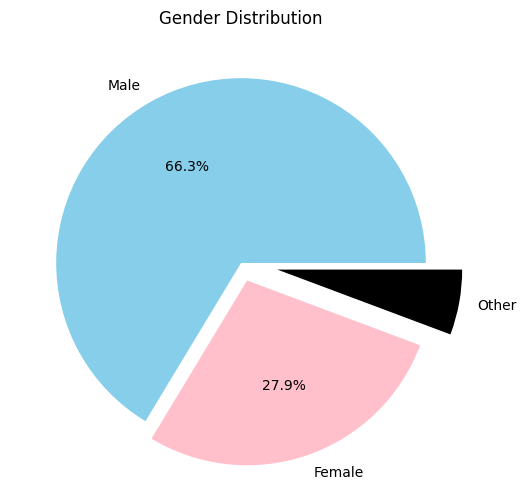

In [ ]:
plt.figure(figsize=(6, 6))
df['What is your gender?'].value_counts().plot.pie(autopct="%1.1f%%", colors=['skyblue', 'pink', 'black'], explode=(0, 0.1, 0.2))
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()

# ---------------- BIVARIATE ANALYSIS ----------------

## Violin plot for Sleep Per Night vs Mental Health Status

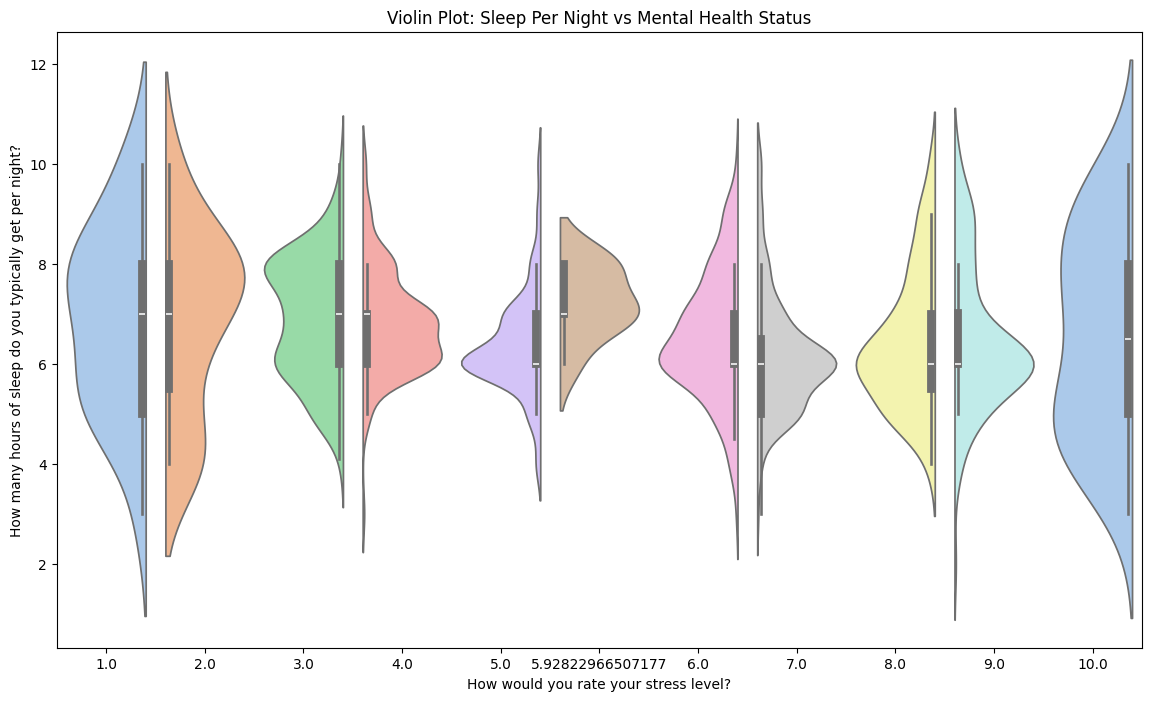

In [ ]:
plt.figure(figsize=(14, 8))
sns.violinplot(x='How would you rate your stress level?', y='How many hours of sleep do you typically get per night?',hue='How would you rate your stress level?', legend=False, data=df, palette='pastel', split=True)
plt.title("Violin Plot: Sleep Per Night vs Mental Health Status")
plt.show()

## Swarm plot for Stress Level by Exercise Frequency

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 55.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 67.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 73.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 68.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 20.2% of the points cannot be plac

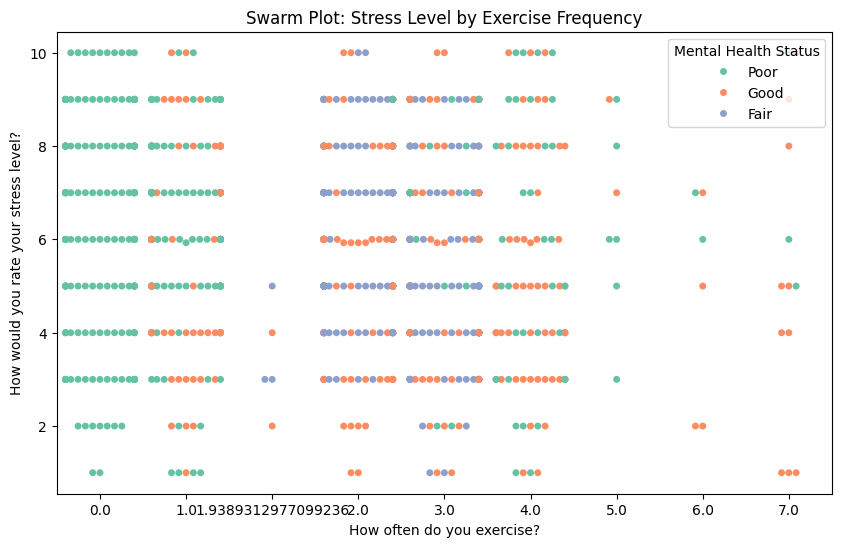

In [ ]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='How often do you exercise?', y='How would you rate your stress level?', hue='Mental Health Status', data=df, palette='Set2')
plt.title("Swarm Plot: Stress Level by Exercise Frequency")
plt.show()

### We can see a major relevation for sleeping 6.0 hours

# ---------------- MULTIVARIATE ANALYSIS ----------------

## Correlation with annotations

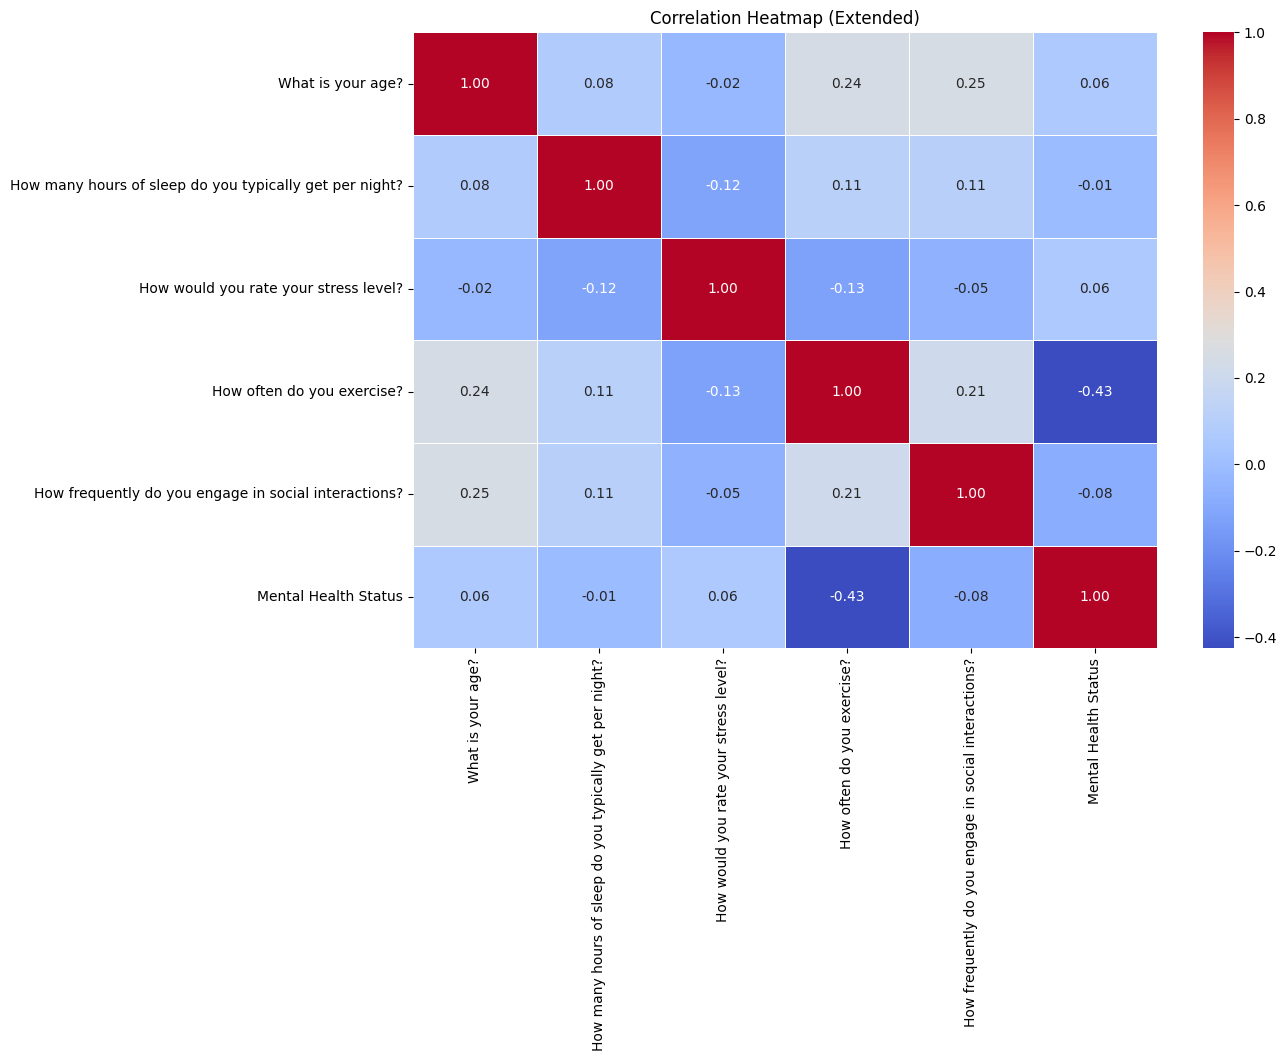

In [ ]:
plt.figure(figsize=(12, 8))
correlation = df[['What is your age?', 'How many hours of sleep do you typically get per night?', 'How would you rate your stress level?', 'How often do you exercise?', 'How frequently do you engage in social interactions?', 'Mental Health Status']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Extended)")
plt.show()

### We can Hours of Sleep Per Night has a very close relation with the Mental Health Status.

## Pairplot: Highlight relationships by Gender and Mental Health Status

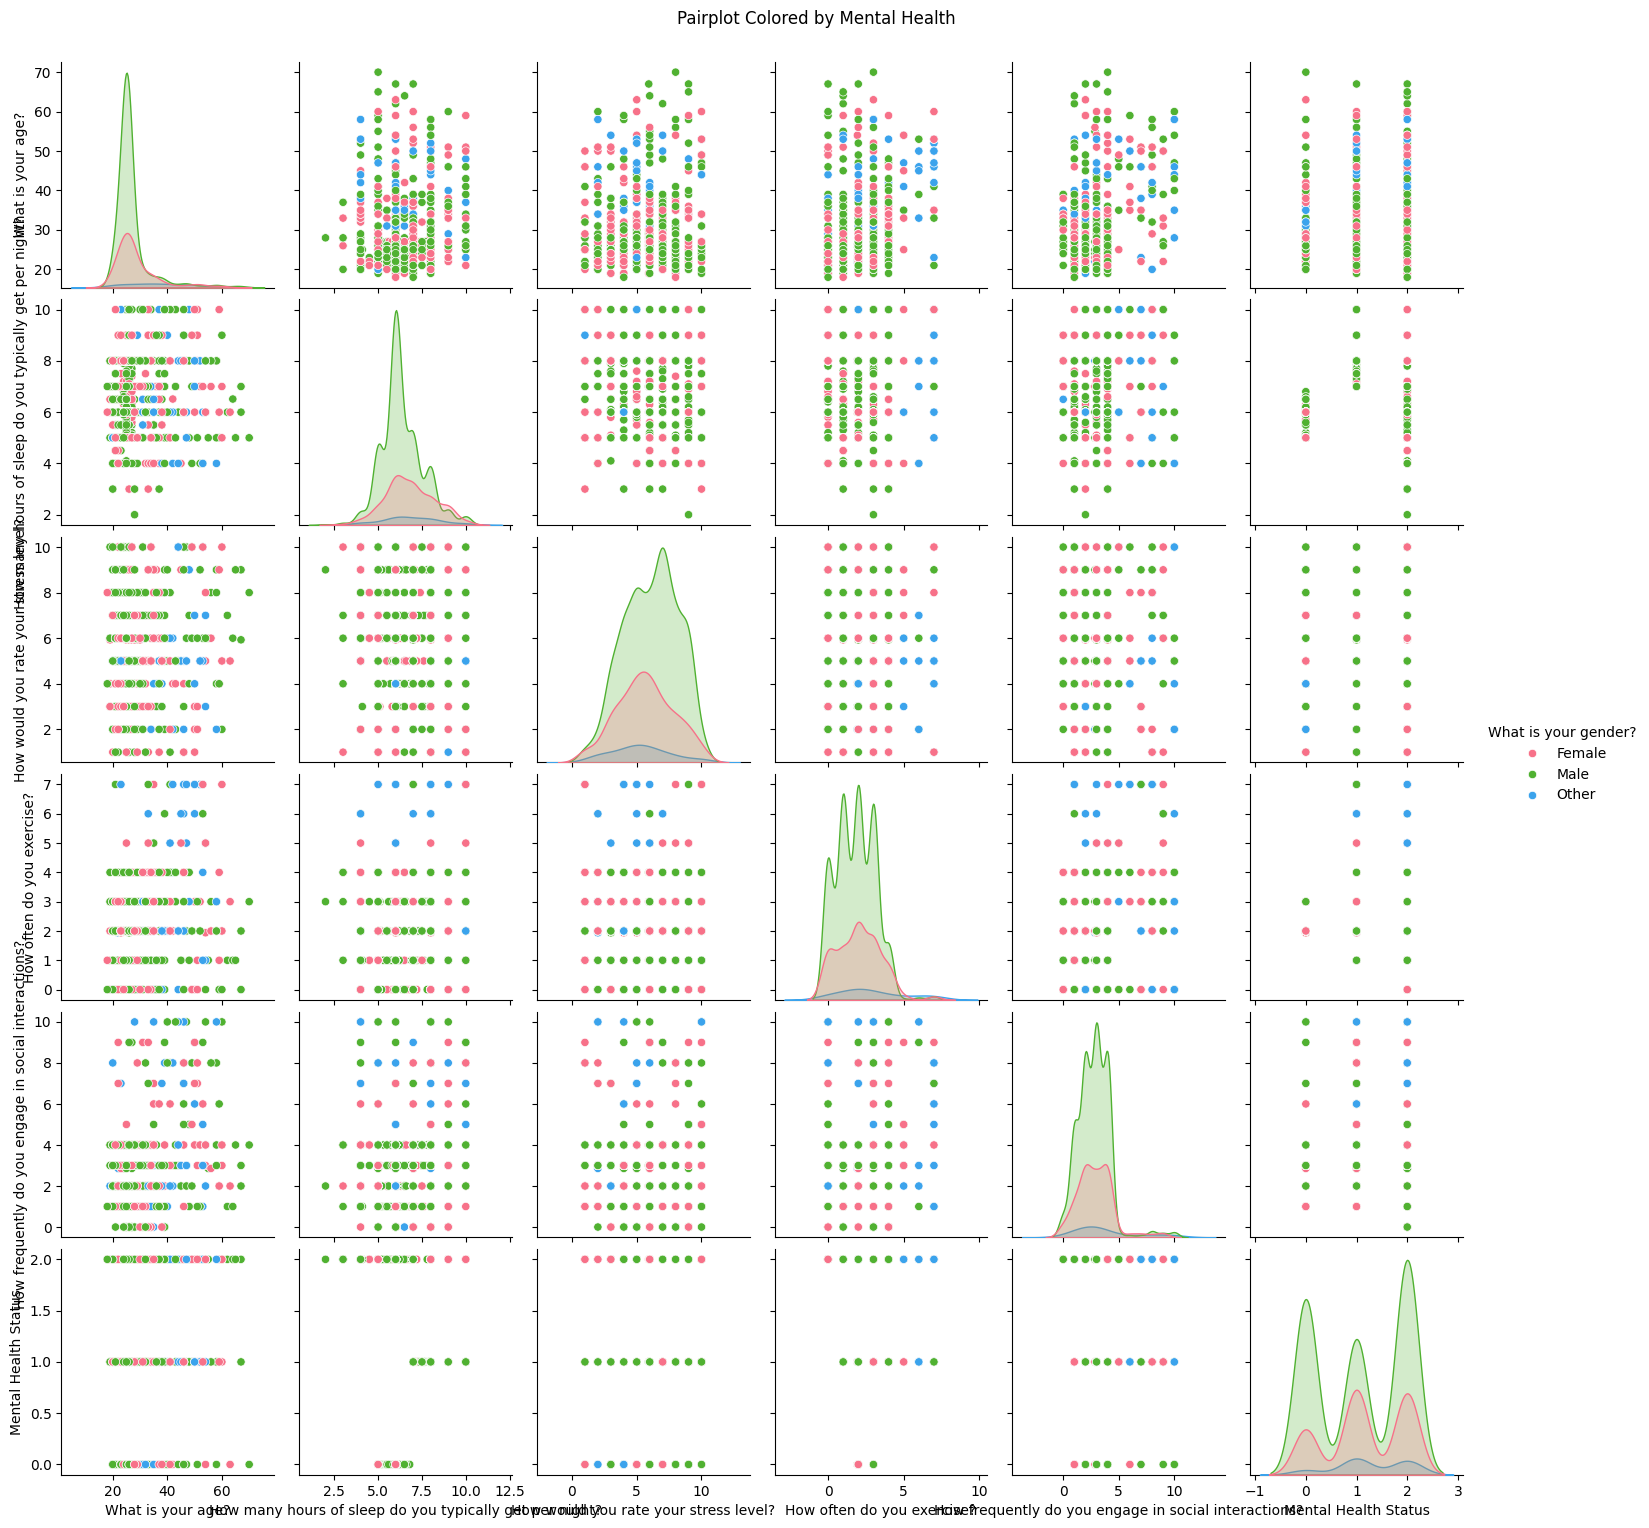

In [ ]:
sns.pairplot(df, hue='What is your gender?', palette='husl', diag_kind='kde')
plt.suptitle("Pairplot Colored by Mental Health", y=1.02)
plt.show()

## Boxplot: Social Interaction Frequency vs Sleep Per Night grouped by Gender

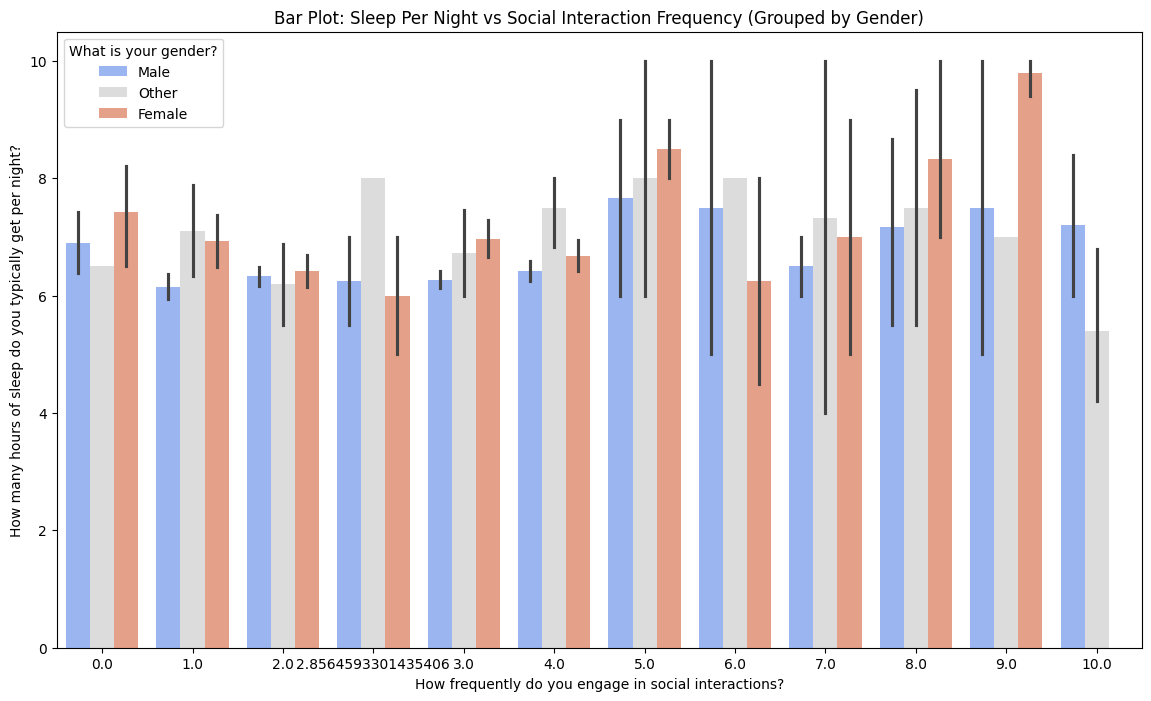

In [ ]:
plt.figure(figsize=(14, 8))
sns.barplot(x='How frequently do you engage in social interactions?', y='How many hours of sleep do you typically get per night?', hue='What is your gender?', data=df, palette='coolwarm')
plt.title("Bar Plot: Sleep Per Night vs Social Interaction Frequency (Grouped by Gender)")
plt.show()


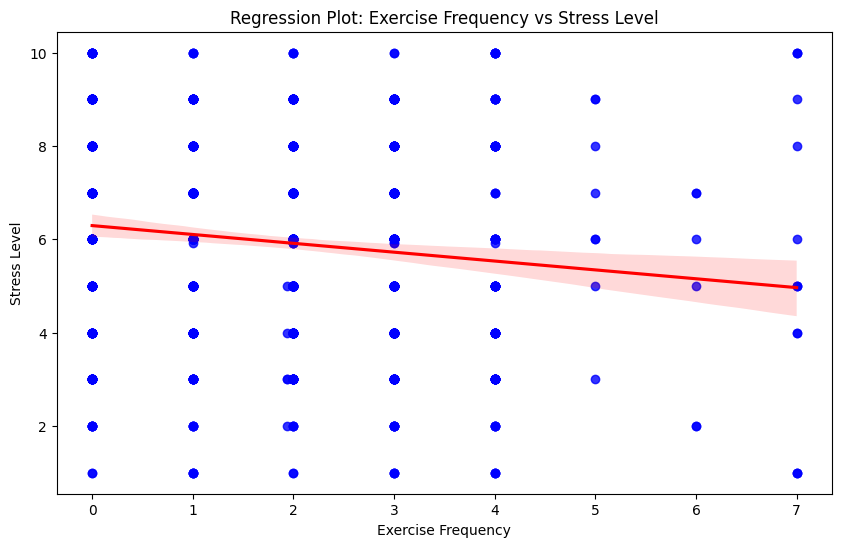

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='How often do you exercise?', y='How would you rate your stress level?', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title("Regression Plot: Exercise Frequency vs Stress Level")
plt.xlabel("Exercise Frequency")
plt.ylabel("Stress Level")
plt.show()

### We can see Higher the excercise frequency, lower the stress level

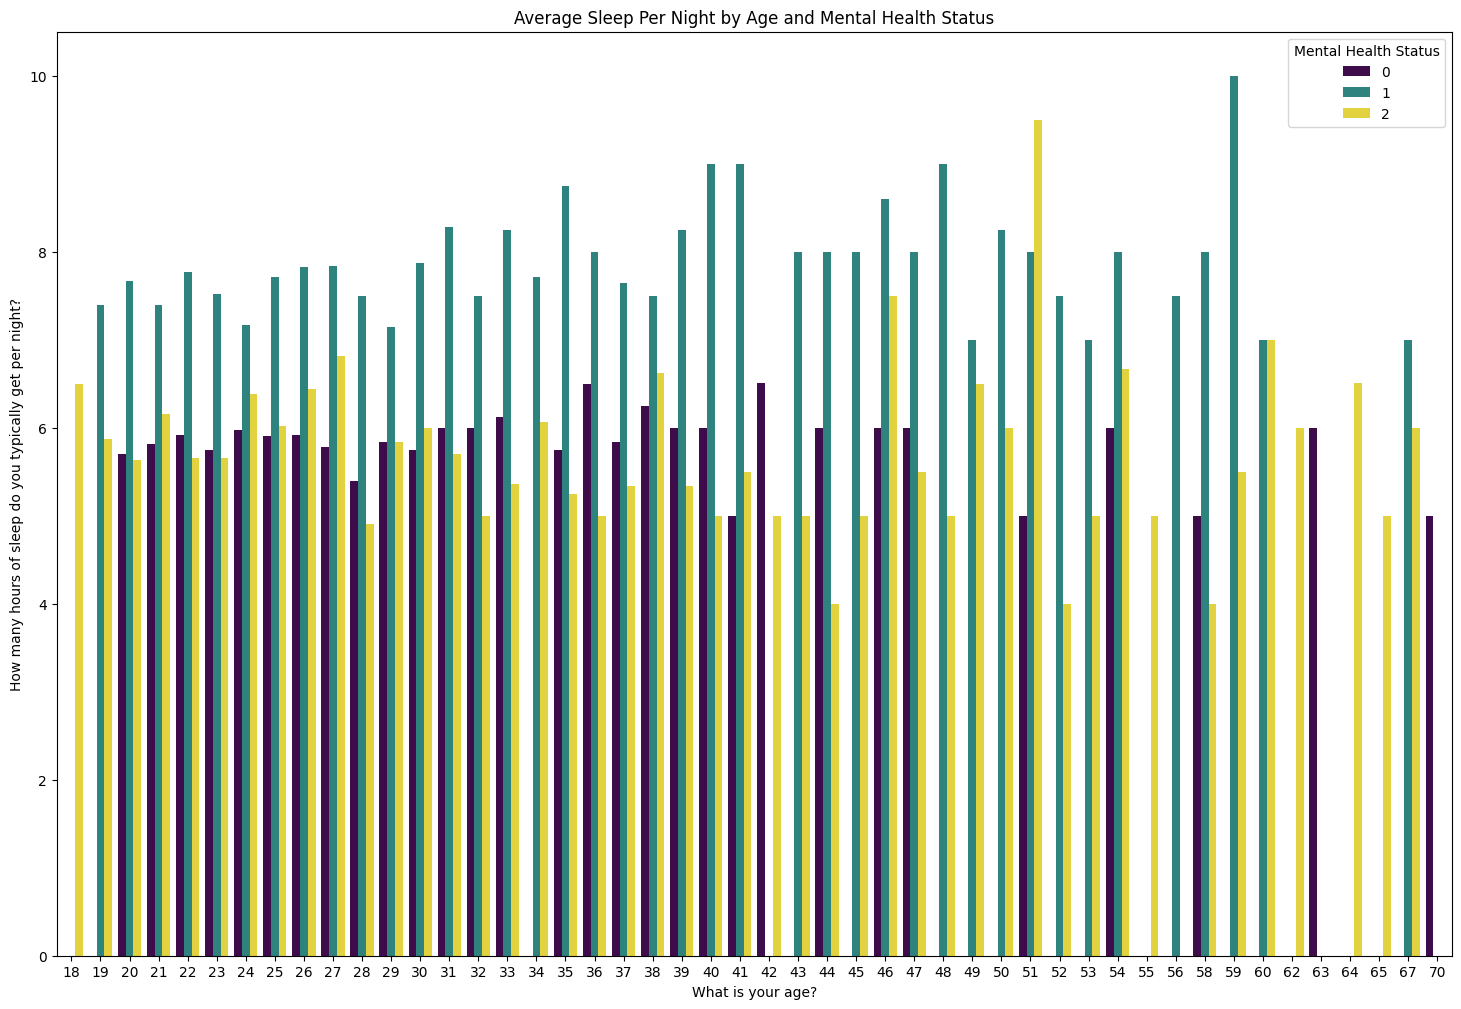

In [ ]:
grouped_data = df.groupby(['What is your age?', 'Mental Health Status'])['How many hours of sleep do you typically get per night?'].mean().reset_index()

plt.figure(figsize=(18, 12))
sns.barplot(x='What is your age?', y='How many hours of sleep do you typically get per night?', hue='Mental Health Status', data=grouped_data, palette='viridis')
plt.title("Average Sleep Per Night by Age and Mental Health Status")
plt.show()

## Scatter plot matrix highlighting clusters of Stress Levels

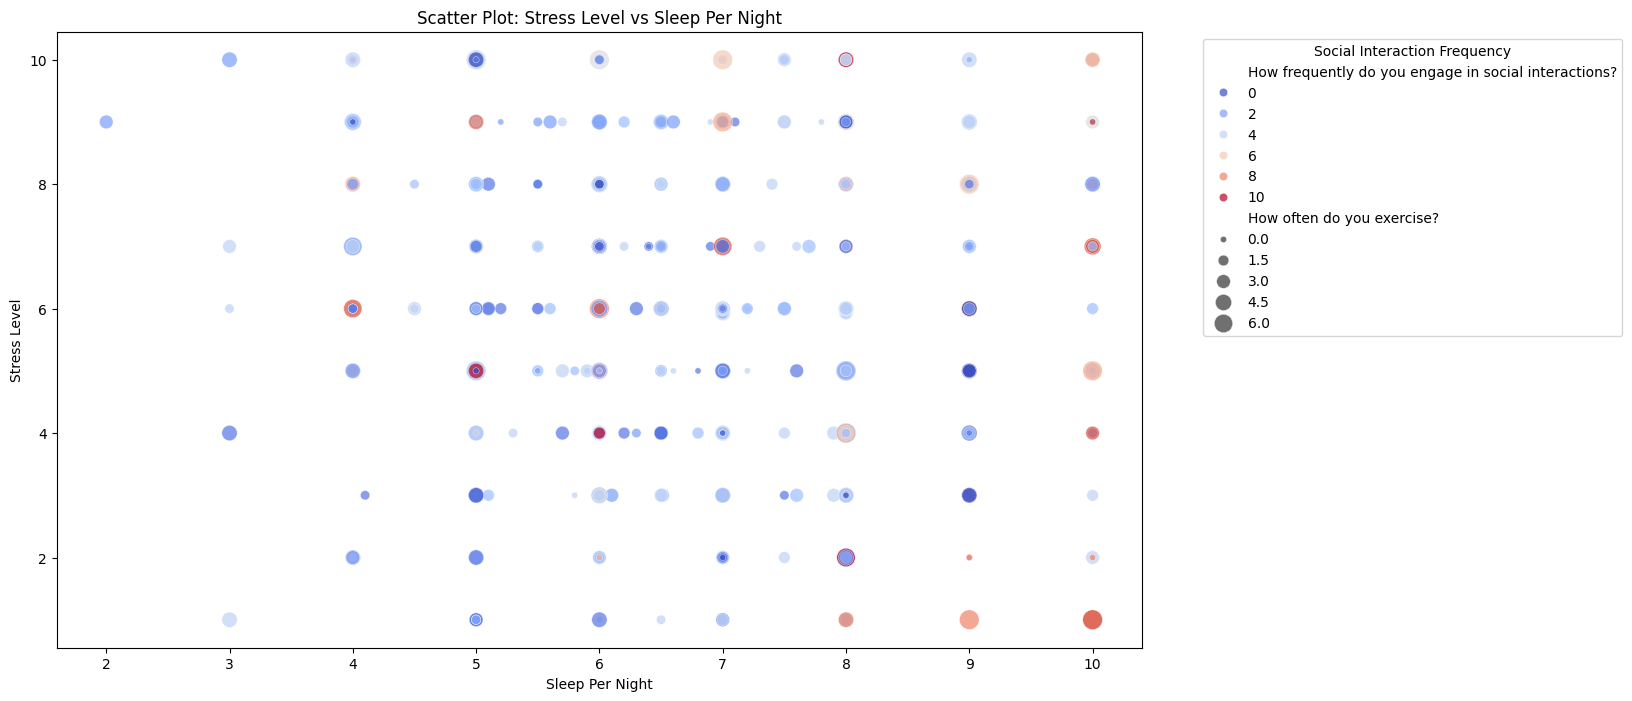

In [ ]:
plt.figure(figsize=(14, 8))
sns.scatterplot(
    x='How many hours of sleep do you typically get per night?', y='How would you rate your stress level?', hue='How frequently do you engage in social interactions?',
    size='How often do you exercise?', data=df, palette='coolwarm', sizes=(20, 200), alpha=0.7
)
plt.title("Scatter Plot: Stress Level vs Sleep Per Night")
plt.xlabel("Sleep Per Night")
plt.ylabel("Stress Level")
plt.legend(title='Social Interaction Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Classification Algorithm

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Prepare features and target
X = df.drop(['Mental Health Status', 'What is your gender?'], axis=1)
y = df['Mental Health Status']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg, zero_division=0))

# Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, zero_division=0))

# Support Vector Classifier
svc = SVC(random_state=42)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print("SVC Accuracy:", accuracy_score(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc, zero_division=0))


Logistic Regression Accuracy: 0.8199052132701422
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        63
           1       0.84      0.83      0.83        63
           2       0.79      0.82      0.80        85

    accuracy                           0.82       211
   macro avg       0.83      0.82      0.82       211
weighted avg       0.82      0.82      0.82       211

Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        63
           2       1.00      1.00      1.00        85

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211

SVC Accuracy: 0.8151658767772512
              precision    recall  f1-score   support

           0       0.83      0.86      0.84        63
           1       

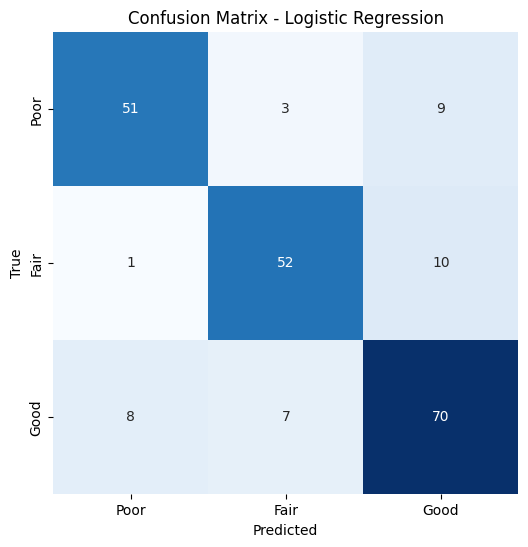

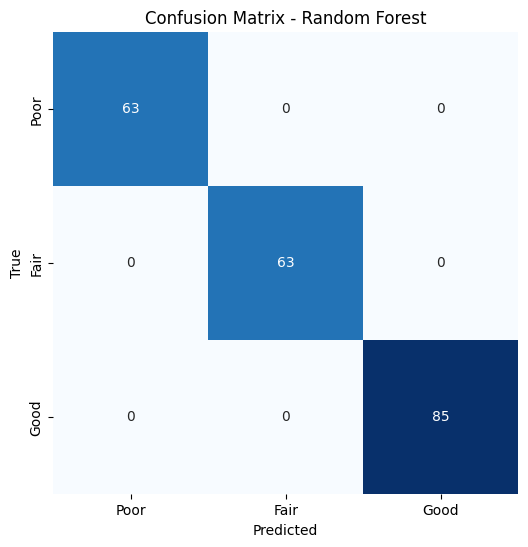

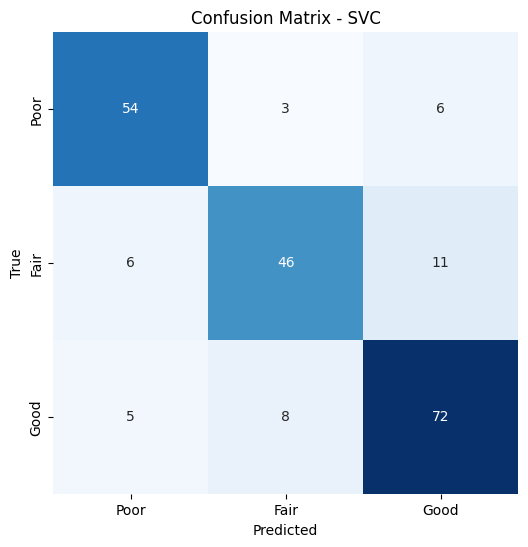

In [ ]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Logistic Regression Confusion Matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Poor', 'Fair', 'Good'], yticklabels=['Poor', 'Fair', 'Good'])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Poor', 'Fair', 'Good'], yticklabels=['Poor', 'Fair', 'Good'])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# SVC Confusion Matrix
cm_svc = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_svc, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Poor', 'Fair', 'Good'], yticklabels=['Poor', 'Fair', 'Good'])
plt.title("Confusion Matrix - SVC")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1052 entries, 0 to 1052
Data columns (total 7 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   What is your age?                                        1052 non-null   int64  
 1   What is your gender?                                     1052 non-null   object 
 2   How many hours of sleep do you typically get per night?  1052 non-null   float64
 3   How would you rate your stress level?                    1052 non-null   float64
 4   How often do you exercise?                               1052 non-null   float64
 5   How frequently do you engage in social interactions?     1052 non-null   float64
 6   Mental Health Status                                     1052 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 65.8+ KB


# **Overall Notebook Analysis Summary**

The notebook performs an analysis of a mental health survey dataset. Here's a breakdown of the key steps:

1.  **Data Loading and Preprocessing**:
    *   The notebook loads a CSV file into a pandas DataFrame.
    *   It handles missing values by filling numerical columns with the mean and categorical columns with the mode.
    *   A new 'Mental Health Status' column is created based on a combination of sleep, exercise, and social interaction, and is then label encoded into numerical values.

2.  **Univariate Analysis**:
    *   A countplot visualizes the distribution of the 'Mental Health Status' categories.
    *   A KDE plot shows the distribution of stress levels.
    *   A pie chart shows the gender distribution in the dataset.

3.  **Bivariate Analysis**:
    *   Violin plots show the relationship between sleep hours and stress levels.
    *   Swarm plots display the relationship between exercise frequency, stress levels, and mental health status.

4.  **Multivariate Analysis**:
    *   Correlation heatmap shows the correlation between different numerical features.
    *   Pairplot visualizes relationships between all pairs of features, grouped by gender.
    *   Bar plot shows the relation between sleep hours and social interaction frequency grouped by gender.
    *   Regression plot visualizes the relationship between exercise frequency and stress levels.
    *   Bar plot showing average sleep per night grouped by age and mental health status.
    *   Scatter plot showing the relationship between sleep, stress, social interaction, and exercise.

5.  **Classification Algorithm**:
    *   The notebook prepares the data by dropping the 'Mental Health Status' and 'What is your gender?' columns to create feature set and the 'Mental Health Status' column becomes the target variable.
    *   The data is split into training and testing sets.
    *   Three classification models are trained: Logistic Regression, Random Forest, and Support Vector Classifier (SVC).
    *   Accuracy scores and classification reports are generated for each model.
    *   Confusion matrices are also displayed for all three models.

**Classification Algorithm Analysis**

*   The notebook trains three different classification algorithms to predict the 'Mental Health Status':
    *   **Logistic Regression:** This model is a linear model which is often used for binary classification but also can be used for multiclass classification.
    *   **Random Forest:** This model uses an ensemble of decision trees to make predictions.
    *   **Support Vector Classifier (SVC):** This model uses a hyperplane to classify data points.

*   The code outputs the accuracy and classification report for each model. It also outputs confusion matrix, which shows the true positive, true negative, false positive and false negative of each class.

**Why 100% Accuracy with Random Forest is Likely Incorrect**

The notebook shows that the Random Forest classifier is achieving 100% accuracy, this is highly suspicious for the following reasons:

1. **Fixed Target Variable**:  The random forest classifier figured out that the target variable is a variable that is calcultated through an equation based on the sleep, excercise and sociaL interaction variables. That is why Random Forest classifier can give 100% accuracy.

2.  **Overfitting**:  A 100% accuracy on the test set typically indicates that the model has overfit the training data. This means the model has memorized the training data instead of learning generalizable patterns and won't perform well on new, unseen data.



In summary, the notebook performs a thorough exploratory data analysis and applies three different classification models to a mental health dataset. However, the 100% accuracy of the Random Forest classifier is highly suspicious and needs further investigation. The provided steps will help to identify and resolve the problem.